Load Libararies. 

In [ ]:
!pip install hdf5storage
from __future__ import division
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from matplotlib import image
from sklearn import svm
from PIL import Image
import cv2
from pathlib import Path
import numpy.matlib
np.set_printoptions(threshold=np.inf)
import numpy.matlib
import sys
import hdf5storage
import scipy.io
import time
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

     |████████████████████████████████| 61kB 3.0MB/s 


Loading representative dataset

In [ ]:
trainX=[]
trainY=[]

classes = ['Buildings', 'Forests', 'Glacier', 'Mountain', 'sea', 'street']

for ind,cls in enumerate(classes):
  print(cls)
  image_folder_train = Path('/content/drive/MyDrive/Representatives/' + cls + '/').rglob('*.jpg')
  files = [x for x in image_folder_train]
  for f in files: 
    
    image = Image.open(f)
    image = np.asarray(image)
    if image.shape == (150, 150, 3):
      trainX.append(image)
      trainY.append(ind)


trainX=np.array(trainX)

Buildings
Forests
Glacier
Mountain
sea
street


Dimensionality reduction using Principle Component Analysis. 

In [ ]:
import random
from sklearn.preprocessing import StandardScaler
trainY=np.array(trainY)
trainX1 = trainX.flatten().reshape(trainX.shape[0], 150*150*3) 
trainX11 = StandardScaler().fit_transform(trainX1)
pca = PCA(n_components=100)
trainX111 = pca.fit_transform(trainX11)


In [ ]:
Comp=pca.components_.T
print(Comp.shape)
print(trainX111.shape)

(67500, 100)
(3063, 100)


New trained data with after PCA

In [ ]:
Train= np.c_[trainX111,trainY]

np.random.shuffle(Train)

trainX11=Train[:,:-1]
trainY1=Train[:,-1]


print(trainY1)

Loading Test data

In [ ]:
testX=[]
testY=[]

classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

for ind,cls in enumerate(classes):
  
  image_folder_test = Path('/content/drive/MyDrive/ImageClassificationProject/seg_test/seg_test/' + cls + '/').rglob('*.jpg')
  files = [x for x in image_folder_test]
  for f in files: 
 
    image = Image.open(f)
    image = np.asarray(image)
    if image.shape == (150, 150, 3):
      testX.append(image)
      testY.append(ind)


testX=np.array(testX)

print(testX.shape)

(3003, 150, 150, 3)


Project the test data on the new features.

In [ ]:
testX1 = testX.flatten().reshape(testX.shape[0], 150*150*3) 
testX2=np.matmul(testX1, Comp)

Training an Training data.

In [ ]:
csf = svm.SVC(C=10000,kernel='poly',decision_function_shape='ovr',gamma=0.01,degree=4 )
csf.fit(trainX11, trainY1)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Testing the classifer on the test data

In [ ]:
from sklearn.metrics import accuracy_score
yp=csf.predict(testX2)
accuracy_score(testY, yp)

0.19080919080919082

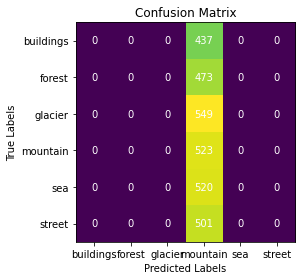

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, yp)


fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
# ... and label them with the respective list entries
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

ax.set_ylabel("True Labels")
ax.set_xlabel("Predicted Labels")
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()